In [1]:
import shift_detector
from shift_detector.Detector import Detector
from shift_detector.checks.SimpleCheck import SimpleCheck
from shift_detector.checks.DistinctionCheck import DistinctionCheck
from shift_detector.checks.SorensenDiceCheck import SorensenDiceCheck
from shift_detector.checks.ConditionalProbabilitiesCheck import ConditionalProbabilitiesCheck

In [2]:
import pandas as pd
'''  
df1 = './../train_ascii.csv'
df1 = pd.read_csv(df1, delimiter=';').sample(100)
df2 = './../audits_ascii.csv'
df2 = pd.read_csv(df2, delimiter=';')
'''
sales = {'brand': ["Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC"] * 10,
         'payment': [150., 200., 50., 10., 5., 150., 200., 50., 10., 5., 1.] * 10,
         'payment2': [15., 2., 5., 0., 5., 3., 200., 50., 10., 5., 1.] * 10,
         'description': ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"] * 10}

sales2 = {'brand': ["Blue Inc", "Alpha Co",
                   "Jones LLC", "Alpha Co", "Blue Inc", "Blue Inc", "Alpha Co",
                   "Jones LLC"] * 10,
         'payment': [10, 5, 150, 200, 50, 10, 5, 1] * 10,
         'payment2': [15, 2, 5, 0, 5, 3, 200, 50] * 10,
         'description': ["D", "E", "F", "G", "H", "I", "J", "K"] * 10}

df1 = pd.DataFrame.from_dict(sales)
df2 = pd.DataFrame.from_dict(sales2)
# df2 = df1

detector = Detector(df1, df2)

2019-06-11 15:03:00,953 [INFO]  Detected numerical columns: payment, payment2
2019-06-11 15:03:00,956 [INFO]  Detected categorical columns: brand
2019-06-11 15:03:00,961 [INFO]  Detected text columns: description
2019-06-11 15:03:00,973 [INFO]  Used columns: brand, payment, payment2, description


In [3]:
sc = SimpleCheck()
dc = DistinctionCheck(num_epochs=10, relative_threshold=0.2)
cp = ConditionalProbabilitiesCheck(min_support=0.01, min_confidence=0.01, rule_limit=10,
                                               min_delta_supports=0.01, min_delta_confidences=0.01)
# sdc = SorensenDiceCheck(n=1)

In [4]:
detector.run(cp)

2019-06-11 15:03:00,990 [INFO]  Execute new Preprocessing
2019-06-11 15:03:00,992 [INFO]  Execute new Preprocessing


OVERVIEW
     Column  # Checks Failed  # Checks Executed
0     brand                0                  1
1   payment                0                  1
2  payment2                0                  1 

DETAILS
Conditional Probabilities
Examined Columns: ['brand', 'payment', 'payment2']
Shifted Columns: [('payment', 'payment2'), ('brand', 'payment2')]

Column 'payment, payment2':
['[ payment:5.0 payment2:5.0 ] \nrule: PAYMENT: 5.0, PAYMENT2: 5.0 ==> () [SUPPORTS_OF_LEFT_SIDES: (0.18181818181818182, 0.0), DELTA_SUPPORTS_OF_LEFT_SIDES: 0.18181818181818182, SUPPORTS: (0.18181818181818182, 0.0), DELTA_SUPPORTS: 0.18181818181818182, CONFIDENCES: (1.0, 0.0), DELTA_CONFIDENCES: 1.0]\nmax_delta_support: 0.18181818181818182\t max_delta_confidence:1.0\t number of subrules:7\n', '[ payment:1.0 payment2:50.0 ] \nrule: PAYMENT: 1.0, PAYMENT2: 50.0 ==> () [SUPPORTS_OF_LEFT_SIDES: (0.0, 0.125), DELTA_SUPPORTS_OF_LEFT_SIDES: -0.125, SUPPORTS: (0.0, 0.125), DELTA_SUPPORTS: -0.125, CONFIDENCES: (0.0, 1.

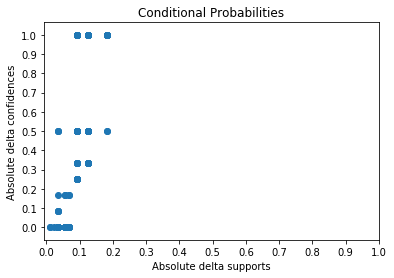

In [5]:
detector.evaluate()